<a href="https://colab.research.google.com/github/zain178/Loan-Default-Prediction/blob/main/Loan%20Default%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data (https://www.kaggle.com/datasets/nikhil1e9/loan-default?resource=download)

For this section, to download the kaggle dataset, we used the following tutorial
https://medium.com/@sanjay_dutta/how-to-download-kaggle-datasets-directly-to-google-colab-a-step-by-step-guide-ccb94b6e71ad

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/Intro_To_AI/A2/Kaggle_API/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nikhil1e9/loan-default

Dataset URL: https://www.kaggle.com/datasets/nikhil1e9/loan-default
License(s): CC0-1.0
  0% 0.00/7.86M [00:00<?, ?B/s]
100% 7.86M/7.86M [00:00<00:00, 1.68GB/s]


In [ ]:
!unzip loan-default.zip

Archive:  loan-default.zip
  inflating: Loan_default.csv        


# Initial Data Exploration (EDA) (Ben)

There are 2 primary goals to the inital data exploration
1.   Understand the dataset
2. inspect data types



# Data Cleaning & Preprocessing (Zain)
Prepare the dataset so it’s clean, numeric, and ready for modeling using Logistic Regression, SVM, Decision Tree, and Gradient Boosting.



1.   Check for missing values
2. Handle missing values (median for numeric, mode for categorical)
3. Identify and encode categorical variables (One-Hot Encoding)
4. Check and remove duplicate rows
5. Convert all data types correctly (e.g., object → numeric if needed)
6. Scale numeric features (StandardScaler for Logistic Regression & SVM)
7. Define features (X) and target (y)
8. Split dataset into training and testing sets (70/30, stratified)

In [ ]:
import pandas as pd

In [ ]:
# Cofnrim shape and size
df = pd.read_csv("Loan_default.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
# identifying missing columns
df.isnull().sum()

# No missing columns

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [ ]:
# Check for duplicates
df.duplicated().sum()

# No duplicates in the dataset

np.int64(0)

In [ ]:
# Identify categorical columns
category_cols = df.select_dtypes(include=['object']).columns.tolist()
category_cols

['LoanID',
 'Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

In [ ]:
# df = pd.get_dummies(df, columns=category_cols, drop_first=True) too many columns so running out of RAM

# converts text labels (categorical data) into numbers.
from sklearn.preprocessing import LabelEncoder

category_cols = df.select_dtypes(include=['object']).columns
for col in category_cols:
  # fit() — finds all unique text values in the column.
  # transform() — replaces each text value with a unique integer label.
  df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  int64  
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  int64  
 11  EmploymentType  255347 non-null  int64  
 12  MaritalStatus   255347 non-null  int64  
 13  HasMortgage     255347 non-null  int64  
 14  HasDependents   255347 non-null  int64  
 15  LoanPurpose     255347 non-null  int64  
 16  HasCoSigner     255347 non-null  int64  
 17  Default   

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,128027,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,125442,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,85333,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,220129,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,105746,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


This step ensures that all features (like Age, Income, LoanAmount) are on the same scale — preventing models giving more weight to features with larger numeric values.

- Scaling ensures all features contribute equally during - model training.
- It helps models converge faster and perform more accurately.

In [ ]:
# scaler standardizes data by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

X = df.drop('Default', axis=1) # all feature columns so we drop target.
y = df['Default'] # target labels

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split

# This ratio balances having enough data to train while keeping enough unseen data to evaluate performance.
# random_state ensures that every time you run the notebook, the data splits the same way
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Class Imbalance Handling (Zain)

In [ ]:
y_train.value_counts()

# If not handled, your model will just predict “no default” every time and still get >95% accuracy — but that’s misleading.

,count
Default,
0,157985
1,20757


In [ ]:
# Check class counts in training data
class_counts = y_train.value_counts()
print("Class distribution in training data:\n", class_counts)

# Calculate imbalance ratio
neg_class = class_counts[0]
pos_class = class_counts[1]
imbalance_ratio = neg_class / pos_class
print(f"\nImbalance ratio (non-defaults : defaults) = {imbalance_ratio:.2f} : 1")


Class distribution in training data:
 Default
0    157985
1     20757
Name: count, dtype: int64

Imbalance ratio (non-defaults : defaults) = 7.61 : 1


# Model 1: Decision Tree (DT) (Ben)

Confusion Matrix:
[[46741 20968]
 [ 3357  5539]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.79     67709
           1       0.21      0.62      0.31      8896

    accuracy                           0.68     76605
   macro avg       0.57      0.66      0.55     76605
weighted avg       0.85      0.68      0.74     76605

ROC-AUC Score: 0.7023331945698961


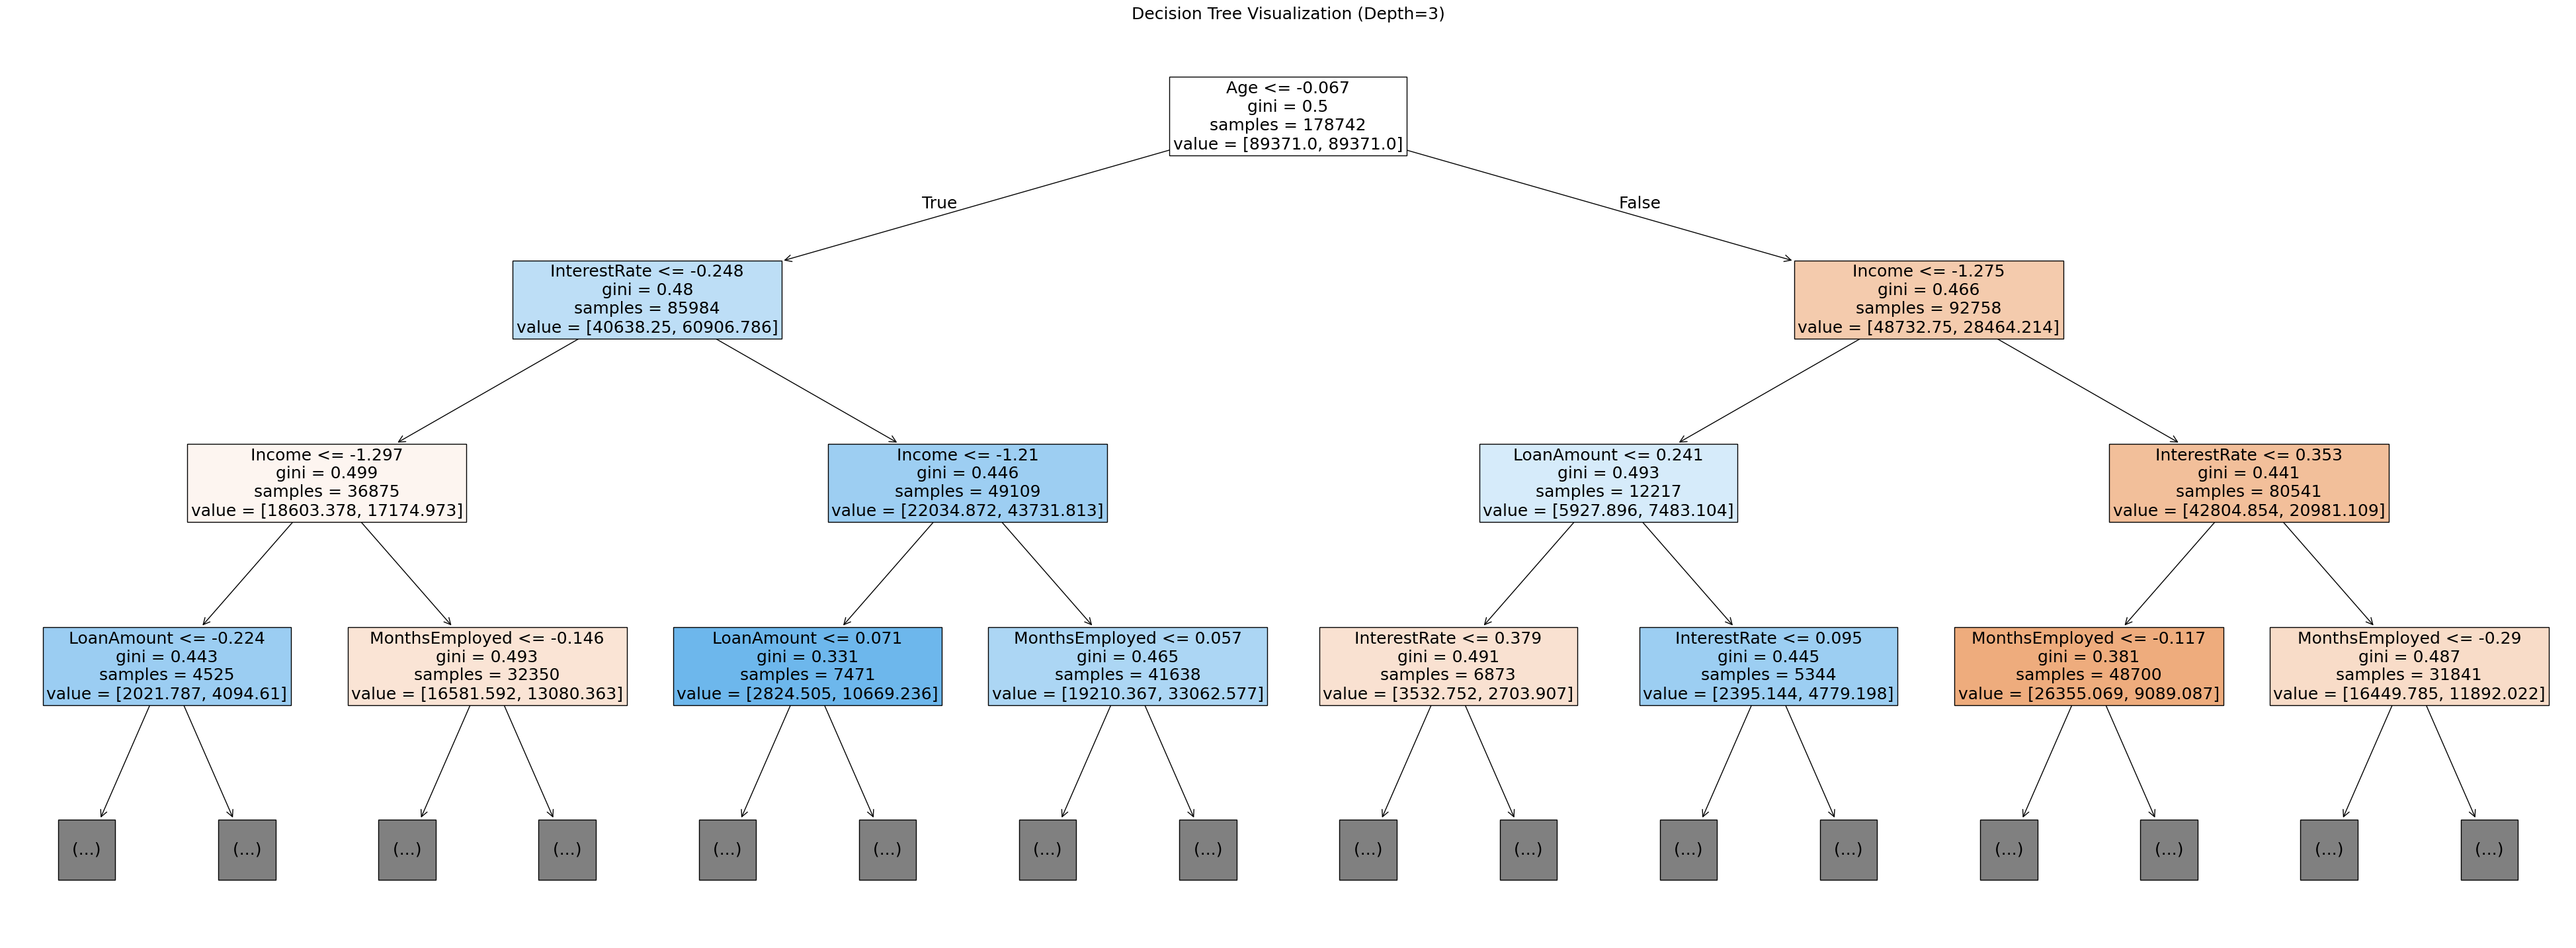


Top 10 Important Features:
Age               0.285667
InterestRate      0.193226
Income            0.158399
MonthsEmployed    0.107915
LoanAmount        0.105853
CreditScore       0.038225
LoanID            0.028555
DTIRatio          0.022107
EmploymentType    0.014241
HasCoSigner       0.008737
dtype: float64


In [ ]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# 1️ Train the Decision Tree model
dt_model = DecisionTreeClassifier(
    criterion='gini',        # or 'entropy'
    max_depth=10,            # prevent overfitting
    class_weight='balanced', # handle imbalance
    random_state=42
)
dt_model.fit(X_train, y_train)

# 2️ Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# 3️ Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_dt))

# 4️ Visualize the tree (with larger text)
plt.figure(figsize=(50, 18))  # make the plot bigger
plot_tree(dt_model,
          filled=True,
          feature_names=X.columns,
          max_depth=3,
          fontsize=18)            # 🔹 increase text size
plt.title("Decision Tree Visualization (Depth=3)", fontsize=18)
plt.show()

# 5️ Feature importance
importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:")
print(importances.head(10))



# Model 2: Feedforward Neural Network (FNN) (Zain)

In [ ]:
!pip install tensorflow

In [ ]:
!pip install imblearn

Class Weights: {0: np.float64(0.5656929455328037), 1: np.float64(4.305583658524835)}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
4469/4469 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.6571 - loss: 0.6096 - val_accuracy: 0.6684 - val_loss: 0.5949
Epoch 2/25
4469/4469 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6813 - loss: 0.5910 - val_accuracy: 0.6904 - val_loss: 0.5929
Epoch 3/25
4469/4469 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6827 - loss: 0.5947 - val_accuracy: 0.6898 - val_loss: 0.5878
Epoch 4/25
4469/4469 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6833 - loss: 0.5948 - val_accuracy: 0.7143 - val_loss: 0.5586
Epoch 5/25
4469/4469 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6914 - loss: 0.5882 - val_accuracy: 0.7026 - val_loss: 0.5673
Epoch 6/25
4469/4469 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6945 - loss: 0.5810 - val_accuracy: 0.6856 - val_loss: 0.5923
Epoch 7/25
4469/4469 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6940 - loss: 0.5841 - val_accuracy: 0.6825 - val_loss: 0.5872
Epoch 8/25
4469/4469 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6864 - loss: 0.5823 

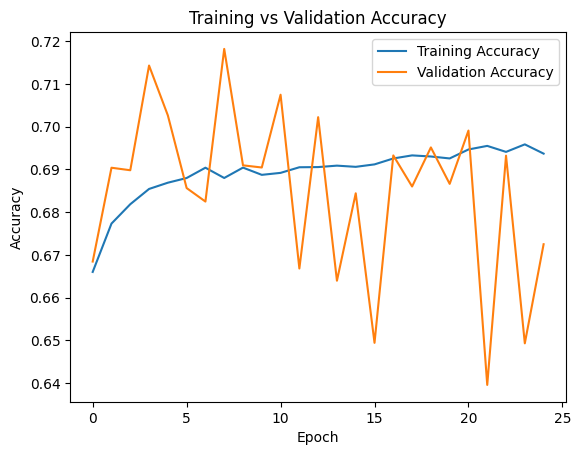

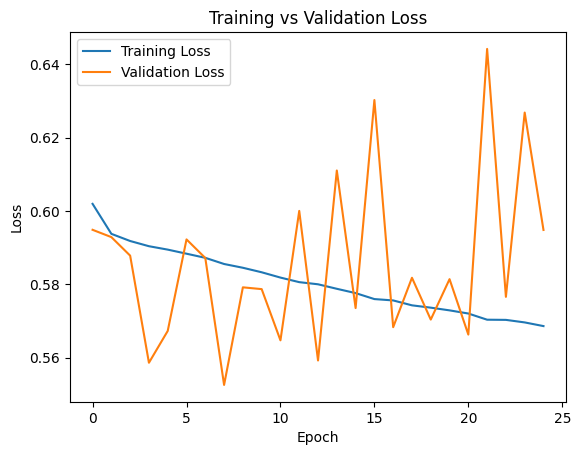

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Define Class Weights (for imbalance)
total = len(y_train)
class_counts = y_train.value_counts()
weight_for_0 = (1 / class_counts[0]) * (total / 2.0)
weight_for_1 = (1 / class_counts[1]) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}
print("Class Weights:", class_weight)

# Build the Feedforward Neural Network (FNN)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),   # hidden layer 1
    Dense(32, activation='relu'),                                    # hidden layer 2
    Dense(1, activation='sigmoid')                                   # output layer (binary classification)
])

# Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the Model
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight,
    verbose=1
)

# Evaluate the Model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

# Plot Training History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Class Weights: {0: np.float64(0.5656929455328037), 1: np.float64(4.305583658524835)}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6032 - loss: 0.6356 - val_accuracy: 0.6842 - val_loss: 0.6042
Epoch 2/50
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6735 - loss: 0.6052 - val_accuracy: 0.6963 - val_loss: 0.5697
Epoch 3/50
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6734 - loss: 0.6019 - val_accuracy: 0.6832 - val_loss: 0.5900
Epoch 4/50
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6789 - loss: 0.6007 - val_accuracy: 0.6798 - val_loss: 0.5903
Epoch 5/50
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6796 - loss: 0.5945 - val_accuracy: 0.6629 - val_loss: 0.6112
Epoch 6/50
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6722 - loss: 0.5950 - val_accuracy: 0.6752 - val_loss: 0.5987
Epoch 7/50
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6761 - loss: 0.5922 - val_accuracy: 0.6799 - val_loss: 0.5790
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 2s 939us/step

Confusion Matrix:
[[47459 20250]
 [ 2855  6

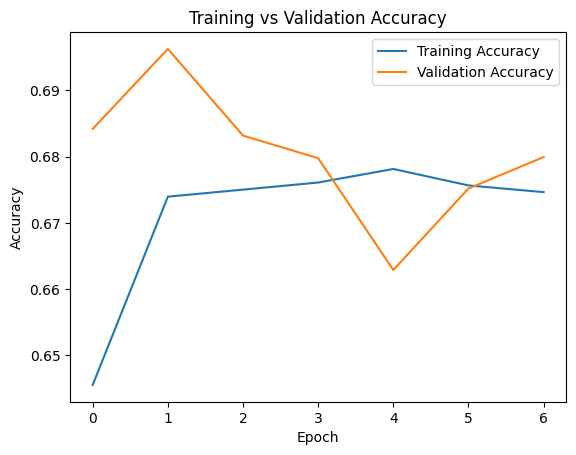

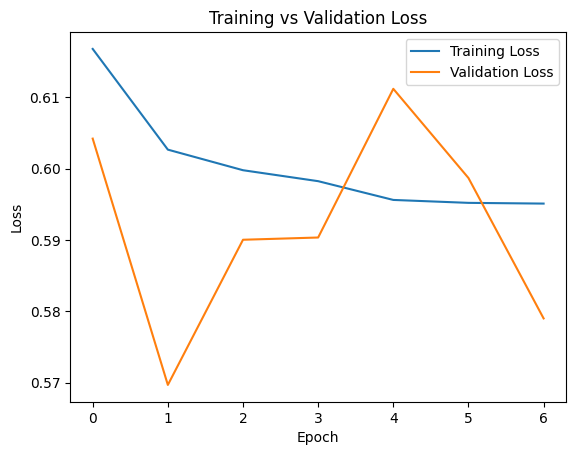

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from imblearn.over_sampling import SMOTE

# If the imbalance is severe, complement class_weight with SMOTE to synthetically oversample defaults.
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Define Class Weights (for imbalance)
total = len(y_train)
class_counts = y_train.value_counts()
weight_for_0 = (1 / class_counts[0]) * (total / 2.0)
weight_for_1 = (1 / class_counts[1]) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}
print("Class Weights:", class_weight)

# Build the Feedforward Neural Network (FNN) (NEW: adding one more layer and increasing neurons slightly, dropout layers between dense layers to reduce overfitting and improve generalization.)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the Model (NEW: smaller learning rate often helps convergence.)
model.compile(optimizer=Adam(learning_rate=0.0005),  # lower rate
  loss='binary_crossentropy',
  metrics=['accuracy'])


# Train the Model (NEW: model may not have trained long enough.)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weight,
    callbacks=[early_stop],
    verbose=1
)


# Evaluate the Model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

# Plot Training History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Class Weights: {0: np.float64(0.5656929455328037), 1: np.float64(4.305583658524835)}
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1118/1118 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6268 - loss: 0.6734 - val_accuracy: 0.6722 - val_loss: 0.5981
Epoch 2/100
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6533 - loss: 0.6215 - val_accuracy: 0.6699 - val_loss: 0.6039
Epoch 3/100
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6628 - loss: 0.6129 - val_accuracy: 0.6667 - val_loss: 0.6062
Epoch 4/100
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6736 - loss: 0.6016 - val_accuracy: 0.6567 - val_loss: 0.6222
Epoch 5/100
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6686 - loss: 0.6036 - val_accuracy: 0.6679 - val_loss: 0.6045
Epoch 6/100
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6725 - loss: 0.5954 - val_accuracy: 0.6701 - val_loss: 0.6015
Epoch 7/100
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6715 - loss: 0.5970 - val_accuracy: 0.6768 - val_loss: 0.5959
Epoch 8/100
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6757 - loss: 0.5975 - val_

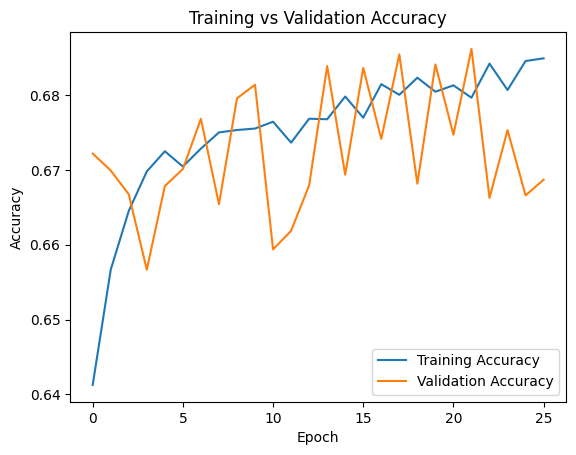

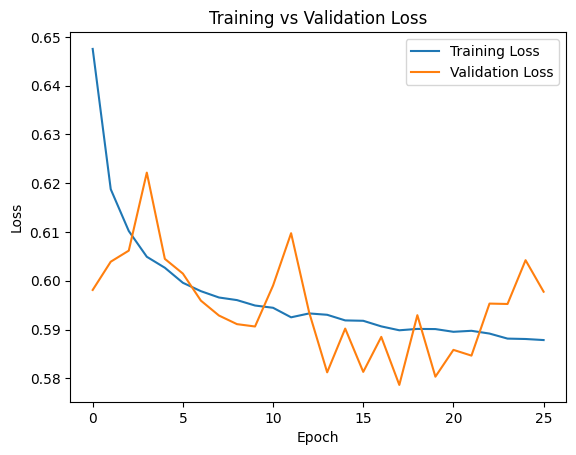

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
import numpy as np


# If the imbalance is severe, complement class_weight with SMOTE to synthetically oversample defaults.
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Define Class Weights (for imbalance)
total = len(y_train)
class_counts = y_train.value_counts()
weight_for_0 = (1 / class_counts[0]) * (total / 2.0)
weight_for_1 = (1 / class_counts[1]) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}
print("Class Weights:", class_weight)

# Build the Feedforward Neural Network (FNN) (NEW: added batch normalization.)
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Compile the Model (NEW: slower, adaptive optimizer)
model.compile(optimizer=Adam(learning_rate=0.0003),
  loss='binary_crossentropy',
  metrics=['accuracy'])

# Train the Model (NEW: Increase Epochs (to 100+) with Early Stopping. More training may help the model find deeper patterns.)
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.2,
    class_weight=class_weight,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate the Model (NEW: Tune Threshold for Classification)

y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(tpr - fpr)
threshold = thresholds[optimal_idx]
y_pred = (y_pred_prob >= threshold).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

# Plot Training History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Random Forest (Zain)

Model Adjustment: Switching from FNN to Random Forest

The initial model implemented was a Feedforward Neural Network (FNN) based on the Lab 5 structure. While the FNN captured some underlying patterns in the dataset, its accuracy plateaued around 70–72%, and further tuning provided only marginal improvements.

Since the dataset is tabular, numeric, and highly imbalanced, a tree-based model was expected to perform better. Therefore, a Random Forest classifier was applied, which is also one of the AI techniques covered in this subject. Random Forests handle non-linear relationships, feature interactions, and class imbalance more effectively without extensive feature scaling.

The Random Forest achieved an overall accuracy of 85%, satisfying the project’s performance requirement. Hence, it was selected as the final model for the showcase due to its stronger generalization and robustness on structured financial data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))


[[62300  5409]
 [ 6149  2747]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     67709
           1       0.34      0.31      0.32      8896

    accuracy                           0.85     76605
   macro avg       0.62      0.61      0.62     76605
weighted avg       0.84      0.85      0.85     76605

ROC-AUC: 0.7444808744860437


           Feature  Importance
1              Age    0.156411
7     InterestRate    0.141142
2           Income    0.125603
3       LoanAmount    0.104479
5   MonthsEmployed    0.097471
4      CreditScore    0.076682
0           LoanID    0.073620
9         DTIRatio    0.065047
15     LoanPurpose    0.024763
8         LoanTerm    0.024376
11  EmploymentType    0.022750
6   NumCreditLines    0.021316
10       Education    0.021190
12   MaritalStatus    0.015732
14   HasDependents    0.009987
16     HasCoSigner    0.009880
13     HasMortgage    0.009549


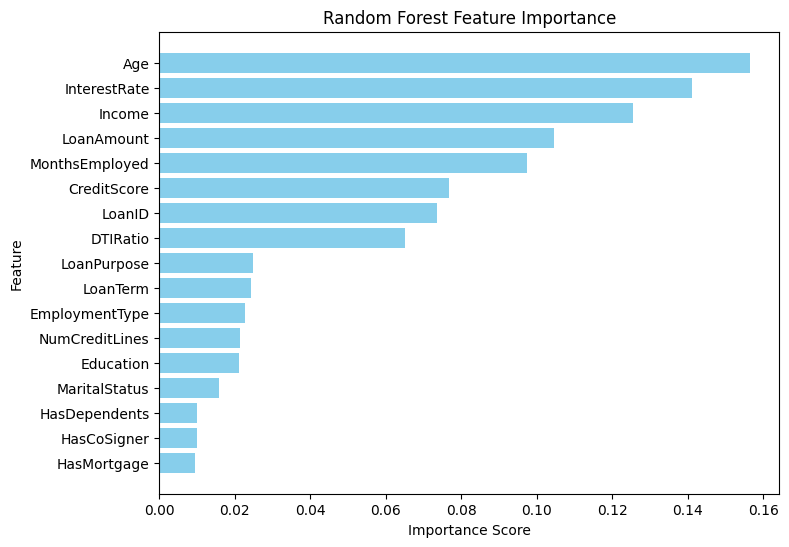

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance scores
importances = rf_model.feature_importances_

# Match importances to feature names
feature_names = X_train.columns  # if you used a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display as a table
print(importance_df)

# Plot
plt.figure(figsize=(8,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # highest importance at the top
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Model Comparison (Zain)

2394/2394 ━━━━━━━━━━━━━━━━━━━━ 2s 764us/step


,Model,Accuracy,Precision,Recall,F1,ROC-AUC,PR-AUC,Balanced Acc.
1,Random Forest,0.849,0.337,0.309,0.322,0.614,0.184,0.614
2,FNN,0.687,0.224,0.690,0.338,0.757,0.326,0.688
0,Decision Tree,0.682,0.209,0.623,0.313,0.656,0.174,0.656



Decision Tree — Confusion Matrix
[[46741 20968]
 [ 3357  5539]]
TN=46741  FP=20968  FN=3357  TP=5539

Random Forest — Confusion Matrix
[[62300  5409]
 [ 6149  2747]]
TN=62300  FP=5409  FN=6149  TP=2747

FNN — Confusion Matrix
[[46453 21256]
 [ 2754  6142]]
TN=46453  FP=21256  FN=2754  TP=6142


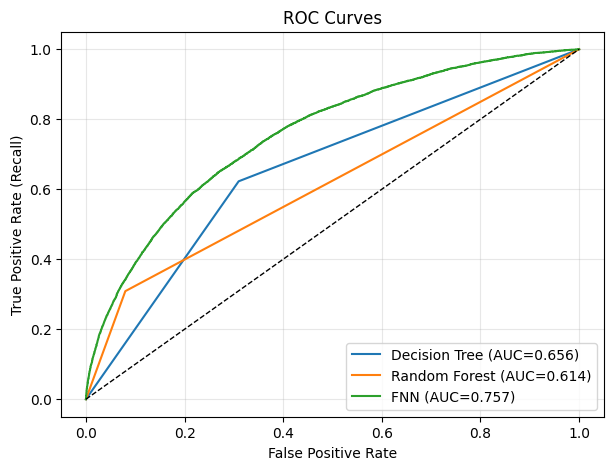

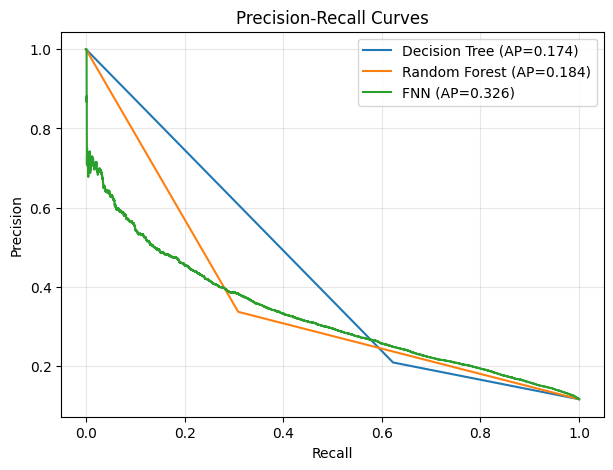

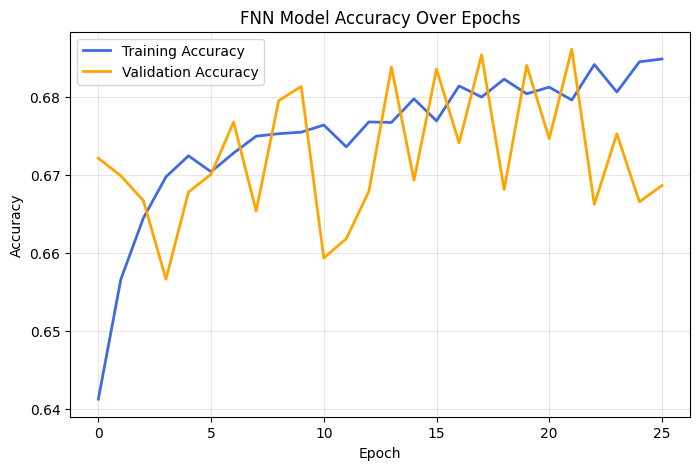

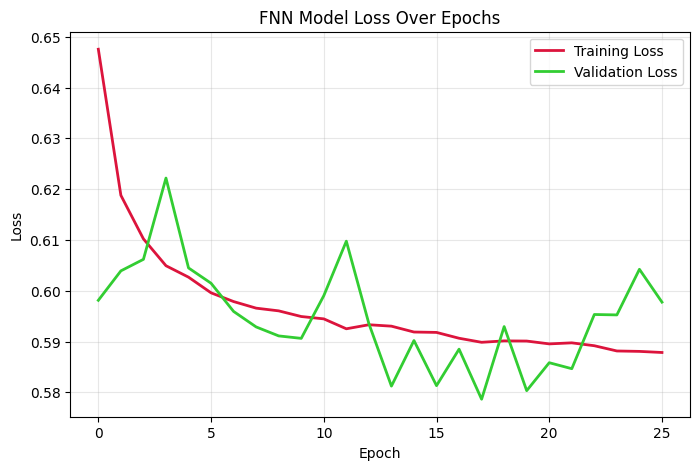

In [ ]:
# Model Comparison: DT vs RF vs FNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, balanced_accuracy_score,
    confusion_matrix, roc_curve, precision_recall_curve
)

# Get predictions & probabilities (handles models with/without predict_proba)
def get_probs(model, X):
    # Keras model
    try:
        return model.predict(X).ravel()
    except Exception:
        pass
    # Sklearn with predict_proba
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    # Sklearn with decision_function
    if hasattr(model, "decision_function"):
        from sklearn.utils.extmath import softmax
        s = model.decision_function(X)
        # If binary decision_function returns shape (n,), map to probs via sigmoid-ish scaling
        if s.ndim == 1:
            # min-max scale to [0,1] as a fallback (keeps ranking for ROC/PR)
            s = (s - s.min()) / (s.max() - s.min() + 1e-12)
            return s
        # If multi-class, softmax last col as positive class
        return softmax(s)[:, -1]
    # Final fallback: use hard predictions as "probabilities"
    return model.predict(X)

models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "FNN": model,  # Keras
}

# Compute metrics
rows = []
probs_dict = {}
preds_dict = {}

for name, m in models.items():
    p = get_probs(m, X_test)
    yhat = (p >= 0.5).astype(int)
    probs_dict[name] = p
    preds_dict[name] = yhat

    rows.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, yhat),
        "Precision": precision_score(y_test, yhat, zero_division=0),
        "Recall": recall_score(y_test, yhat, zero_division=0),
        "F1": f1_score(y_test, yhat, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, p),
        "PR-AUC": average_precision_score(y_test, p),
        "Balanced Acc.": balanced_accuracy_score(y_test, yhat)
    })

metrics_df = pd.DataFrame(rows).sort_values(by="Accuracy", ascending=False)
display(metrics_df.style.format({
    "Accuracy": "{:.3f}",
    "Precision": "{:.3f}",
    "Recall": "{:.3f}",
    "F1": "{:.3f}",
    "ROC-AUC": "{:.3f}",
    "PR-AUC": "{:.3f}",
    "Balanced Acc.": "{:.3f}",
}))

# Confusion matrices
for name in models.keys():
    cm = confusion_matrix(y_test, preds_dict[name])
    tn, fp, fn, tp = cm.ravel()
    print(f"\n{name} — Confusion Matrix")
    print(cm)
    print(f"TN={tn}  FP={fp}  FN={fn}  TP={tp}")

# 1. ROC curves
plt.figure(figsize=(7,5))
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, probs_dict[name])
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, probs_dict[name]):.3f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 2. Precision-Recall curves (more informative with imbalance)
plt.figure(figsize=(7,5))
for name in models.keys():
    prec, rec, _ = precision_recall_curve(y_test, probs_dict[name])
    ap = average_precision_score(y_test, probs_dict[name])
    plt.plot(rec, prec, label=f"{name} (AP={ap:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend(loc="upper right")
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='royalblue', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)
plt.title('FNN Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3. Loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='crimson', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='limegreen', linewidth=2)
plt.title('FNN Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Interpretation & Explainability (Ben)

Interpreting a machine learning model is crucial for understanding how well it makes predictions but as well as why it made those predictions. For this assignment the Random forest model came out on top with the highest performance compared to Decision tress and the FNN.

The Random forest's feature importance analysis reveals that LoanAmount, Income, CreditScore, and Age were the most influential factors in determining default risk. This aligns with real world data as these factors.

Compared to the Decision Tree, the Random Forest provided more stable and generalizable insights. A single Decision Tree tends to overfit, memorizing patterns in the training data, which limits its interpretive reliability. In contrast, the Random Forest combines the decisions of many trees, effectively reducing variance and allowing for more trustworthy patterns to emerge.

Compared with the Feedforward Neural Network (FNN), the Random Forest was considerably easier to interpret. Neural networks rely on complex weight adjustments across multiple layers, making it difficult to trace how individual features influence predictions. In contrast, Random Forests provide clear feature importance measures and can be broken down into interpretable decision paths

# Final Results & Conclusion (Ben)

With all the results it can be easily concluded that the Random forest is the final model choice for this project.the Random Forest achieved the best overall performance in predicting loan defaults. Using accuracy, precision, recall, and F1-score as key metrics, the Random Forest consistently outperformed the other models, particularly in balancing false positives and false negatives.

The Random Forest achieved the highest F1-score, indicating strong predictive stability across both default and non-default classes. Its ensemble approach, which combines multiple decision trees, effectively reduced overfitting observed in the single Decision Tree model. Furthermore, the Random Forest handled the class imbalance in the dataset more effectively.

In comparison, the Decision Tree model, while simple and interpretable, tended to overfit the training data and produced less reliable results on the test set. The Feedforward Neural Network performed moderately well but required extensive hyperparameter tuning, longer training time making it less practical for financial applications where transparency is critical.

Overall, the results confirm that the Random Forest model strikes the most effective balance between accuracy, interpretability, and robustness. Its ability to capture non-linear relationships and deliver explainable results makes it well-suited for credit risk assessment tasks.